Load needed packages

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC


df and df_master load

In [8]:
master_path = "~/DAT/encoded_df_master.csv"

df_master = pd.read_csv(master_path)

In [9]:
df_master.drop(columns=['OUTPUT'], inplace=True)

df_master

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,...,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,EJECTION,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_ROLE,PERSON_SEX,COLLISION_COUNT,OUTPUT2
0,2241,575,1,140,24245,30196,54826,0,0,47,...,202,341,102476,598,5605,3395,899,655,1,2
1,2335,493,1,164,28609,22891,72104,0,0,47,...,227,342,163525,638,5606,3396,1033,832,0,2
2,2335,497,0,122,71154,34921,189100,2,0,47,...,189,219,50538,557,4484,2520,607,647,2,0
3,2335,898,2,14,46582,14675,134723,0,0,30,...,202,341,64815,558,4485,3214,608,819,1,2
4,2335,1010,3,203,26572,43928,63404,0,0,44,...,177,339,82940,556,4483,2519,606,636,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755316,3133,1200,0,105,69051,26339,185254,1,0,8,...,166,265,76458,526,3834,3392,578,628,4,0
755317,3133,575,1,144,22542,21394,49251,0,0,30,...,202,341,125257,637,5605,3395,1043,744,1,2
755318,3133,1374,3,197,48990,25075,143406,0,0,47,...,214,342,171961,638,5606,3396,1044,745,0,2
755319,3119,570,1,139,21414,26048,46142,0,0,47,...,214,342,182844,638,5606,3396,1044,745,0,2


In [10]:
df = df_master

## This is a simple Neural Network that only removes output 2 and leaving the rest of the columns intact for the model to look at

In [12]:
# Select features and target
X = df.drop(columns=['OUTPUT2'])
y = df['OUTPUT2']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the model 
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9942 - loss: 0.0158 - val_accuracy: 0.9999 - val_loss: 0.0016
Epoch 2/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 968us/step - accuracy: 1.0000 - loss: 6.3276e-04 - val_accuracy: 1.0000 - val_loss: 4.4220e-04
Epoch 3/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 988us/step - accuracy: 1.0000 - loss: 4.4519e-04 - val_accuracy: 1.0000 - val_loss: 1.3430e-04
Epoch 4/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 1.0000 - loss: 2.3687e-04 - val_accuracy: 0.9999 - val_loss: 5.9908e-04
Epoch 5/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 1.0000 - loss: 1.7383e-04 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 999us/step - accuracy: 1.0000 - loss: 2.2275e-04 - val_accuracy: 0.9999 - val_loss: 0.0019
Epoch 7/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 980us/step - accuracy: 1.0000 - loss: 5.0698e-04 - val_accuracy: 1.0000 - val_loss: 1.4452e-04
Epoch 8/10
15107/1510

In [15]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy}")


4721/4721 ━━━━━━━━━━━━━━━━━━━━ 3s 642us/step - accuracy: 1.0000 - loss: 1.7437e-05
Test accuracy: 0.9999735355377197


### This simple network is getting too much predictive information from the dataset so i'm looking for variables that may diclose any information that may reveal what OUTPUT 2 is like PERSON_INJURY and NUMBER OF PEOPLE INJURIED or KILLED.

Mean Squared Error: 0.0006316071708926805
R-squared: 0.9991755824432605


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

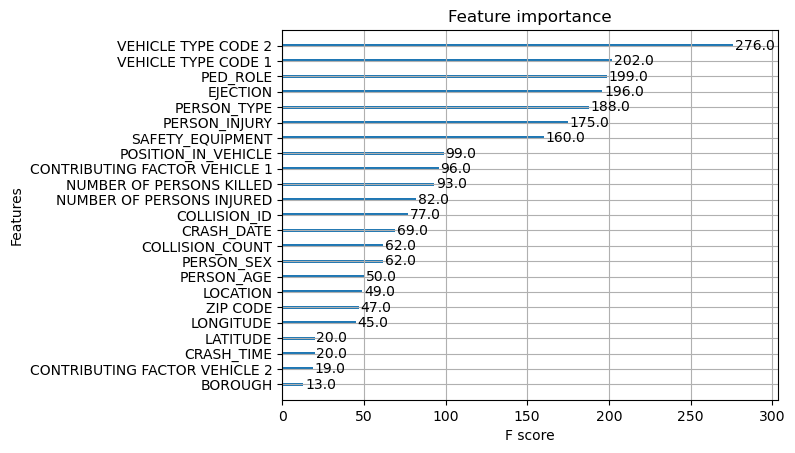

In [19]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(['OUTPUT2'], axis=1) 
y = df['OUTPUT2'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

xgb.plot_importance(model)


### This XGboost model shows the importence that the varaibles have on the OUTPUT variable many of these columns are valid even with such a high F score but 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'PERSON_INJURY' all got removed for the next model. This is because they offer too much information that would not be realistic for the model to know in an acutal prediction.

Epoch 1/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.8282 - loss: 0.4142 - val_accuracy: 0.8465 - val_loss: 0.3739
Epoch 2/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 984us/step - accuracy: 0.8474 - loss: 0.3747 - val_accuracy: 0.8478 - val_loss: 0.3710
Epoch 3/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 976us/step - accuracy: 0.8498 - loss: 0.3699 - val_accuracy: 0.8486 - val_loss: 0.3676
Epoch 4/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 983us/step - accuracy: 0.8516 - loss: 0.3653 - val_accuracy: 0.8501 - val_loss: 0.3673
Epoch 5/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 991us/step - accuracy: 0.8518 - loss: 0.3645 - val_accuracy: 0.8507 - val_loss: 0.3653
Epoch 6/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 980us/step - accuracy: 0.8512 - loss: 0.3650 - val_accuracy: 0.8512 - val_loss: 0.3630
Epoch 7/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8524 - loss: 0.3623 - val_accuracy: 0.8520 - val_loss: 0.3631
Epoch 8/10
15107/15107 ━━━━━━━━━━━━━━━━━━━━ 15s 999us/step 

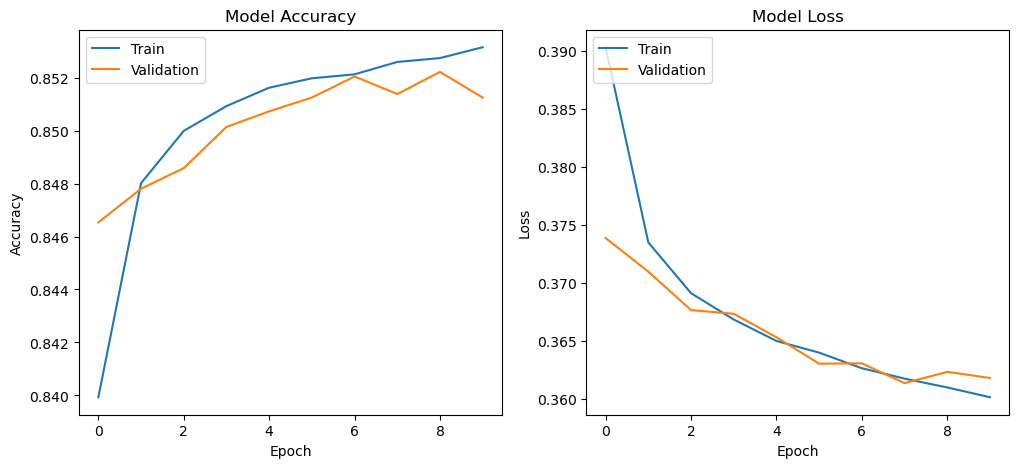

In [22]:
X = df.drop(['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'PERSON_INJURY', 'OUTPUT2'], axis=1)
y = df['OUTPUT2']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training and validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### The accuracy of the training data continued to increase consistently through the 10 epoch but the validation accuracy started to fluctuate around epoch 6 so increasing runs will not improve the models predictions and will likely just result in even more over-fitting.

### The 

Fold Accuracy: 85.16400456428528%
Fold Accuracy: 85.14205813407898%
Fold Accuracy: 85.14735698699951%
Fold Accuracy: 85.07916927337646%
Fold Accuracy: 85.18640995025635%


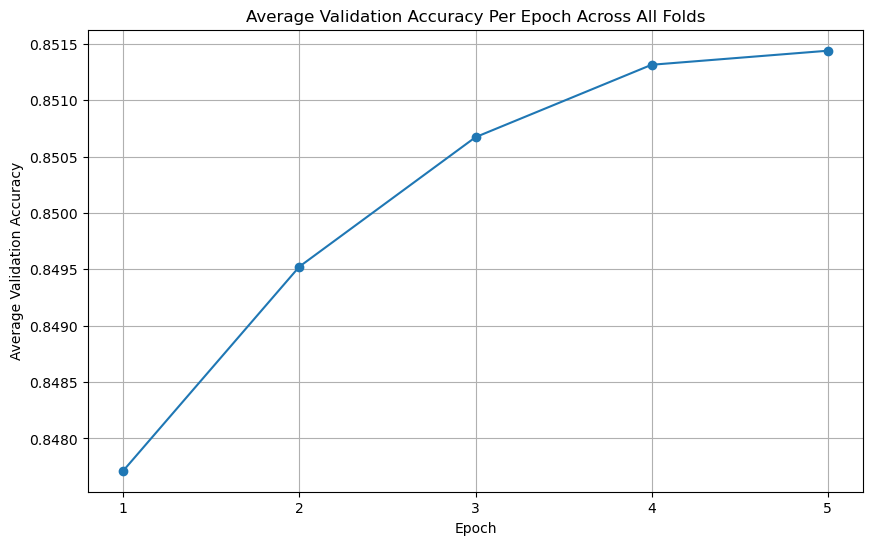

Mean Cross-Validation Accuracy: 85.14379978179932% (+/- 0.03582359377800042%)


In [21]:
X = df.drop(['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'PERSON_INJURY', 'OUTPUT2'], axis=1)
y = df['OUTPUT2'].values

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define k-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
epoch_histories = []

for train, test in kfold.split(X_scaled, y):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Fit the model
    history = model.fit(X_scaled[train], y[train], epochs=5, verbose=0, validation_data=(X_scaled[test], y[test]))

    # Store history in list
    epoch_histories.append(history.history['val_accuracy'])

    # Evaluate the model
    scores = model.evaluate(X_scaled[test], y[test], verbose=0)
    print(f"Fold Accuracy: {scores[1]*100}%")
    cvscores.append(scores[1] * 100)

# Calculate average accuracy for each epoch across all folds
average_epoch_accuracy = np.mean(epoch_histories, axis=0)

# Plot the average accuracy per epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(average_epoch_accuracy) + 1), average_epoch_accuracy, marker='o', linestyle='-')
plt.title('Average Validation Accuracy Per Epoch Across All Folds')
plt.xlabel('Epoch')
plt.ylabel('Average Validation Accuracy')
plt.xticks(range(1, len(average_epoch_accuracy) + 1))
plt.grid(True)
plt.show()

print(f"Mean Cross-Validation Accuracy: {np.mean(cvscores)}% (+/- {np.std(cvscores)}%)")
